In [1]:
#Mileage or MPG Prediction of a vehicle

In [2]:
#Objective - We will predict the fuel efficiency(miles per gallon) of a vehicle based on the independent variables like weight,displacement,model year,etc.
#I have used Linear Regression to predict

In [3]:
#Data Source - https://github.com/YBIFoundation/Dataset/blob/main/MPG.csv

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df=pd.read_csv('MPG.csv')

In [27]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [28]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [29]:
df=df.dropna()

In [30]:
df.corr()

C:\Users\Dell\AppData\Local\Temp\ipykernel_15512\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


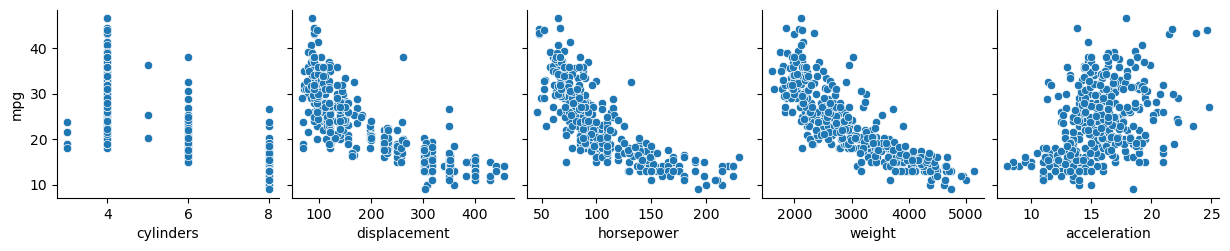

In [31]:
sns.pairplot(data=df,x_vars=['cylinders','displacement','horsepower','weight','acceleration'],y_vars='mpg')

<Axes: xlabel='horsepower', ylabel='mpg'>

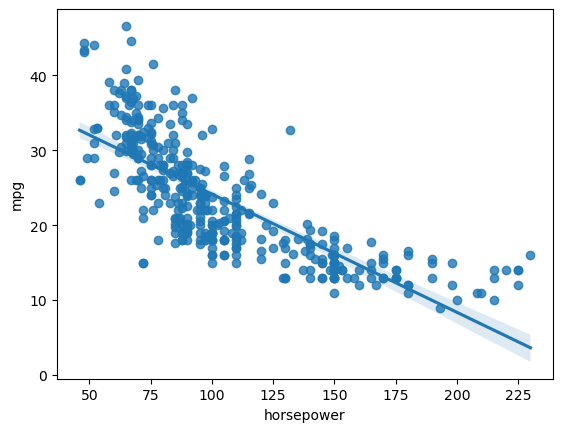

In [32]:
sns.regplot(data=df,x='horsepower',y='mpg')

In [33]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [34]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [35]:
X=df[['displacement','horsepower','weight','acceleration']]
y=df['mpg']

In [36]:
X.head()

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5


In [37]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [38]:
scaled_X=scale.fit_transform(X_train)
scaled_X_test=scale.transform(X_test)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=42)

In [40]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [41]:
model.fit(scaled_X,y_train)
X_train.shape
X_test.shape

(275, 4)

In [42]:
prediction=model.predict(scaled_X_test)
prediction

array([29.77885357, 25.17593435, 32.75614291, 29.89648984, 26.33802993,
       30.26394845,  9.95104165, 29.03187687, 22.02729428, 32.15456334,
       14.68967823, 24.35619918, 12.20385624, 30.35061916, 20.65199839,
       25.98571032, 23.05595932, 29.00548865, 27.76928851, 28.10157192,
       24.70227618, 28.22467334, 31.66460967, 19.33223908, 32.23014599,
       29.3557485 , 24.2028212 , 20.92312775, 30.80097274, 27.49784681,
       12.69066353, 21.91827913, 18.61853701, 26.92046977, 12.2465048 ,
       31.58753147, 12.0721454 , 29.90050076, 13.66371883,  8.2356121 ,
       15.78051201, 30.96741969, 31.42284294, 30.20778284, 11.72115867,
        7.46337065, 21.65361203, 31.4664723 , 27.26452406, 32.52853199,
       13.80068638, 28.7812401 , 28.61368248, 29.95124155, 23.5678205 ,
       18.19144952, 21.82974159, 23.27449316, 27.68897208, 29.61518863,
        5.7019631 , 22.33591512, 25.81587273, 25.25942935, 27.59259411,
       29.12733091, 26.643171  , 32.60888068, 20.39557144, 10.72

In [43]:
model.intercept_

23.742735042735042

In [44]:
model.coef_

array([-1.77830908, -1.78023455, -3.82991463, -0.99316786])

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

In [46]:
MAE=mean_absolute_error(y_test,prediction)
MAE

3.547366622134288

In [47]:
RMSE=np.sqrt(MAE)
RMSE

1.8834454125708788

In [48]:
mean_squared_error(y_test,prediction)

21.433615710649555

In [57]:
test=np.array([[302.0,140.0,5000,12]])
a=scale.transform(test)
model.predict(a)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([12.00426577])

In [56]:
#Explanation - We Created a Linear Model in which we predicted the mpg value after training the data using Linear Regression

In [66]:
from sklearn.preprocessing import PolynomialFeatures
polyfeatures=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)
X_train2=polyfeatures.fit_transform(scaled_X)
X_test2=polyfeatures.transform(scaled_X_test)

In [67]:
poly_model=LinearRegression()
poly_model.fit(X_train2,y_train)

LinearRegression()

In [68]:
poly_model.intercept_

21.594134871409413

In [77]:
poly_model.coef_
pred=poly_model.predict(X_test2)
pred

array([30.73912626, 22.5819009 , 34.96907971, 29.52527314, 26.139653  ,
       31.1757253 , 13.1508967 , 29.20429297, 20.79082402, 35.63619237,
       13.00690361, 22.29635167, 14.00210469, 31.47061042, 16.90094791,
       23.87548301, 21.7145325 , 29.64043704, 28.68784839, 27.98364497,
       22.60430004, 29.83933447, 33.49110916, 15.47488749, 34.9443217 ,
       29.35440928, 22.65871108, 19.5369849 , 33.85912725, 27.52516109,
       14.17246775, 21.20016642, 16.77333134, 27.27454754, 12.91798247,
       33.44551601, 13.87131543, 29.93105012, 14.39947645, 11.53002718,
       15.32654413, 32.5490312 , 32.3016958 , 31.97201696, 13.82155997,
       14.31698063, 19.57699703, 33.97345744, 27.12194721, 34.93500498,
       13.96712336, 27.85446179, 27.20581261, 29.64211237, 19.99451996,
       17.97003034, 18.45111933, 20.70171315, 25.79563433, 29.47791623,
       15.027264  , 21.42247007, 23.51803795, 24.87998131, 26.67290101,
       28.70315977, 26.21313298, 35.10373461, 18.41346033, 13.17

In [80]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAError=mean_absolute_error(y_test,pred)
MAError

3.236194309523338

In [82]:
MSError=mean_squared_error(y_test,pred)
MSError

18.950455126695637